# Obesity Risk Prediction — **Exploratory Data Analysis (EDA)**  
**Team:** *Abhay Aggarwal*, *Surya Ganiga*

> This notebook performs **EDA only** on `train.csv`. No preprocessing or feature engineering is applied to the original dataframe.  
> We focus on understanding the **dependent variable `WeightCategory`**, how features behave individually and with respect to it, and we develop a **reasoned motivation** for adding **BMI** later during preprocessing.

## Table of Contents
1. [Setup & Imports](#setup)  
2. [Load Data](#load)  
3. [Quick Audit](#audit)  
4. [Target Analysis — `WeightCategory`](#target)  
5. [Univariate EDA (Grouped)](#univariate)  
6. [Bivariate EDA vs `WeightCategory` (Grouped)](#bivariate)  
7. [Correlation & Height–Weight Insight → BMI Motivation](#corr-bmi)  
8. [Focused Analyses](#focused)  
9. [Categorical Association (Chi-square & Cramér’s V)](#assoc)  
10. [Key Insights & Next Steps](#insights)

## 1) Setup & Imports <a id='setup'></a>

In [3]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Visual style
plt.rcParams["figure.dpi"] = 120
sns.set_theme(style="whitegrid", context="notebook")
pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)

## 2) Load Data <a id="load"></a>
We assume `train.csv` is in the **current working directory**.

In [5]:
TRAIN_PATH = "train_combined.csv"
df = pd.read_csv(TRAIN_PATH)
print("Shape:", df.shape)
display(df.head())
display(df.tail(3))

Shape: (17644, 19)


,Age,CAEC,CALC,CH2O,FAF,FAVC,FCVC,Gender,Height,NCP,NObeyesdad,SCC,TUE,Weight,WeightCategory,family_history_with_overweight,id,__source__,BMI
0,24.443011,Sometimes,Sometimes,2.763573,0.000000,yes,2.000000,Male,1.699998,2.983297,NaN,no,0.976473,81.669950,Overweight_Level_II,yes,0.0,competition,28.259565
1,18.000000,Frequently,no,2.000000,1.000000,yes,2.000000,Female,1.560000,3.000000,NaN,no,1.000000,57.000000,Normal_Weight,yes,1.0,competition,23.422091
2,18.000000,Sometimes,no,1.910378,0.866045,yes,1.880534,Female,1.711460,1.411685,NaN,no,1.673584,50.165754,Insufficient_Weight,yes,2.0,competition,17.126706
3,20.952737,Sometimes,Sometimes,1.674061,1.467863,yes,3.000000,Female,1.710730,3.000000,NaN,no,0.780199,131.274851,Obesity_Type_III,yes,3.0,competition,44.855798
4,31.641081,Sometimes,Sometimes,1.979848,1.967973,yes,2.679664,Male,1.914186,1.971472,NaN,no,0.931721,93.798055,Overweight_Level_II,yes,4.0,competition,25.599151


,Age,CAEC,CALC,CH2O,FAF,FAVC,FCVC,Gender,Height,NCP,NObeyesdad,SCC,TUE,Weight,WeightCategory,family_history_with_overweight,id,__source__,BMI
17641,22.524036,Sometimes,Sometimes,2.054193,1.414209,yes,3.0,Female,1.752206,3.0,Obesity_Type_III,no,0.646288,133.689352,Obesity_Type_III,yes,NaN,original,43.543817
17642,24.361936,Sometimes,Sometimes,2.852339,1.139107,yes,3.0,Female,1.739450,3.0,Obesity_Type_III,no,0.586035,133.346641,Obesity_Type_III,yes,NaN,original,44.071535
17643,23.664709,Sometimes,Sometimes,2.863513,1.026452,yes,3.0,Female,1.738836,3.0,Obesity_Type_III,no,0.714137,133.472641,Obesity_Type_III,yes,NaN,original,44.144338


**Observation:**  
- Verify column names (especially `WeightCategory`) and any obvious typos or unexpected values in the preview above.

## 3) Quick Audit <a id="audit"></a>
Basic structure, data types, summary stats, and missing values.

In [10]:
print("\nData Types:")
display(df.dtypes.to_frame("dtype"))

print("\nSummary (numeric):")
display(df.describe().T)

print("\nSummary (object/categorical):")
display(df.describe(include="object").T)

print("\nMissing Values:")
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])


Data Types:


,dtype
Age,float64
CAEC,object
CALC,object
CH2O,float64
FAF,float64
FAVC,object
FCVC,float64
Gender,object
Height,float64
NCP,float64



Summary (numeric):


,count,mean,std,min,25%,50%,75%,max
Age,17644.0,23.875686,5.751195,14.000000,20.000000,22.771612,26.000000,61.000000
CH2O,17644.0,2.025279,0.608376,1.000000,1.750272,2.000000,2.530035,3.000000
FAF,17644.0,0.980955,0.838544,0.000000,0.015860,1.000000,1.587406,3.000000
FCVC,17644.0,2.440060,0.531300,1.000000,2.000000,2.348344,3.000000,3.000000
Height,17644.0,1.700129,0.088362,1.450000,1.630730,1.700000,1.763215,1.980000
NCP,17644.0,2.751476,0.715792,1.000000,3.000000,3.000000,3.000000,4.000000
TUE,17644.0,0.619084,0.603181,0.000000,0.000000,0.575848,1.000000,2.000000
Weight,17644.0,87.641752,26.350050,39.000000,66.000000,84.000000,111.275646,173.000000
id,15533.0,7766.000000,4484.135201,0.000000,3883.000000,7766.000000,11649.000000,15532.000000
BMI,17644.0,30.152589,8.280545,12.868541,24.114038,29.384757,36.731203,54.997991



Summary (object/categorical):


,count,unique,top,freq
CAEC,17644,4,Sometimes,14891
CALC,17644,4,Sometimes,12686
FAVC,17644,2,yes,16050
Gender,17644,2,Male,8851
NObeyesdad,2111,7,Obesity_Type_I,351
SCC,17644,2,no,17034
WeightCategory,17644,7,Obesity_Type_III,3307
family_history_with_overweight,17644,2,yes,14422
__source__,17644,2,competition,15533



Missing Values:


NObeyesdad    15533
id             2111
dtype: int64

**Observation:**  
- Note which columns are numeric vs categorical.  
- Identify columns with missing data for later preprocessing.  
- Confirm that the target column is present and correctly typed.

## 4) Target Analysis — `WeightCategory` <a id="target"></a>

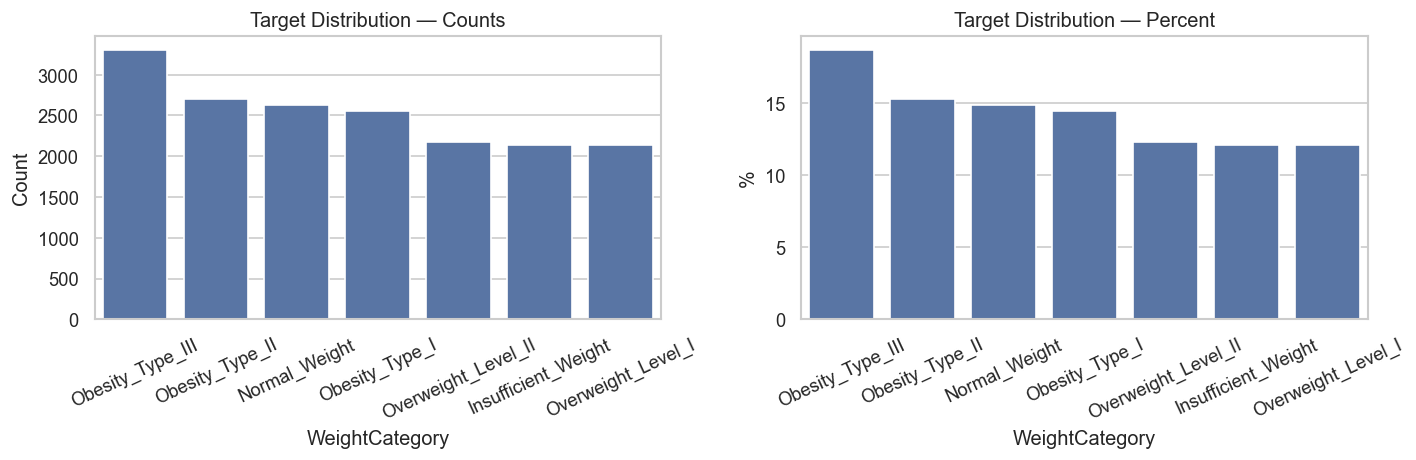

Target distribution (%):


,%
WeightCategory,
Obesity_Type_III,18.74
Obesity_Type_II,15.30
Normal_Weight,14.92
Obesity_Type_I,14.50
Overweight_Level_II,12.30
Insufficient_Weight,12.14
Overweight_Level_I,12.09


In [14]:
TARGET = "WeightCategory"
if TARGET not in df.columns:
    raise ValueError(f"'{TARGET}' not found in the dataset.")
    
vc = df[TARGET].value_counts(dropna=False)
vc_pct = (vc / vc.sum() * 100).round(2)

fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x=vc.index, y=vc.values, ax=ax[0])
ax[0].set_title("Target Distribution — Counts")
ax[0].set_xlabel(TARGET); ax[0].set_ylabel("Count"); ax[0].tick_params(axis="x", rotation=25)

sns.barplot(x=vc_pct.index, y=vc_pct.values, ax=ax[1])
ax[1].set_title("Target Distribution — Percent")
ax[1].set_xlabel(TARGET); ax[1].set_ylabel("%"); ax[1].tick_params(axis="x", rotation=25)

plt.tight_layout(); plt.show()

print("Target distribution (%):")
display(vc_pct.to_frame("%"))

# Class order for consistency
class_order = vc.index.tolist()

**Observation:**  
- Inspect **class balance**. If some classes are scarce, we’ll plan stratified CV and possibly class-weighting during modeling.

## 5) Univariate EDA (Grouped) <a id="univariate"></a>
We group outputs to reduce scrolling.

In [18]:
# Identify feature types
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
if TARGET in num_cols: num_cols.remove(TARGET)
if TARGET in cat_cols: cat_cols.remove(TARGET)

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['Age', 'CH2O', 'FAF', 'FCVC', 'Height', 'NCP', 'TUE', 'Weight', 'id', 'BMI']
Categorical columns: ['CAEC', 'CALC', 'FAVC', 'Gender', 'NObeyesdad', 'SCC', 'family_history_with_overweight', '__source__']


**Observation:**  
- The split above informs encoding choices later (OHE for categoricals, scaling for numerics if needed).

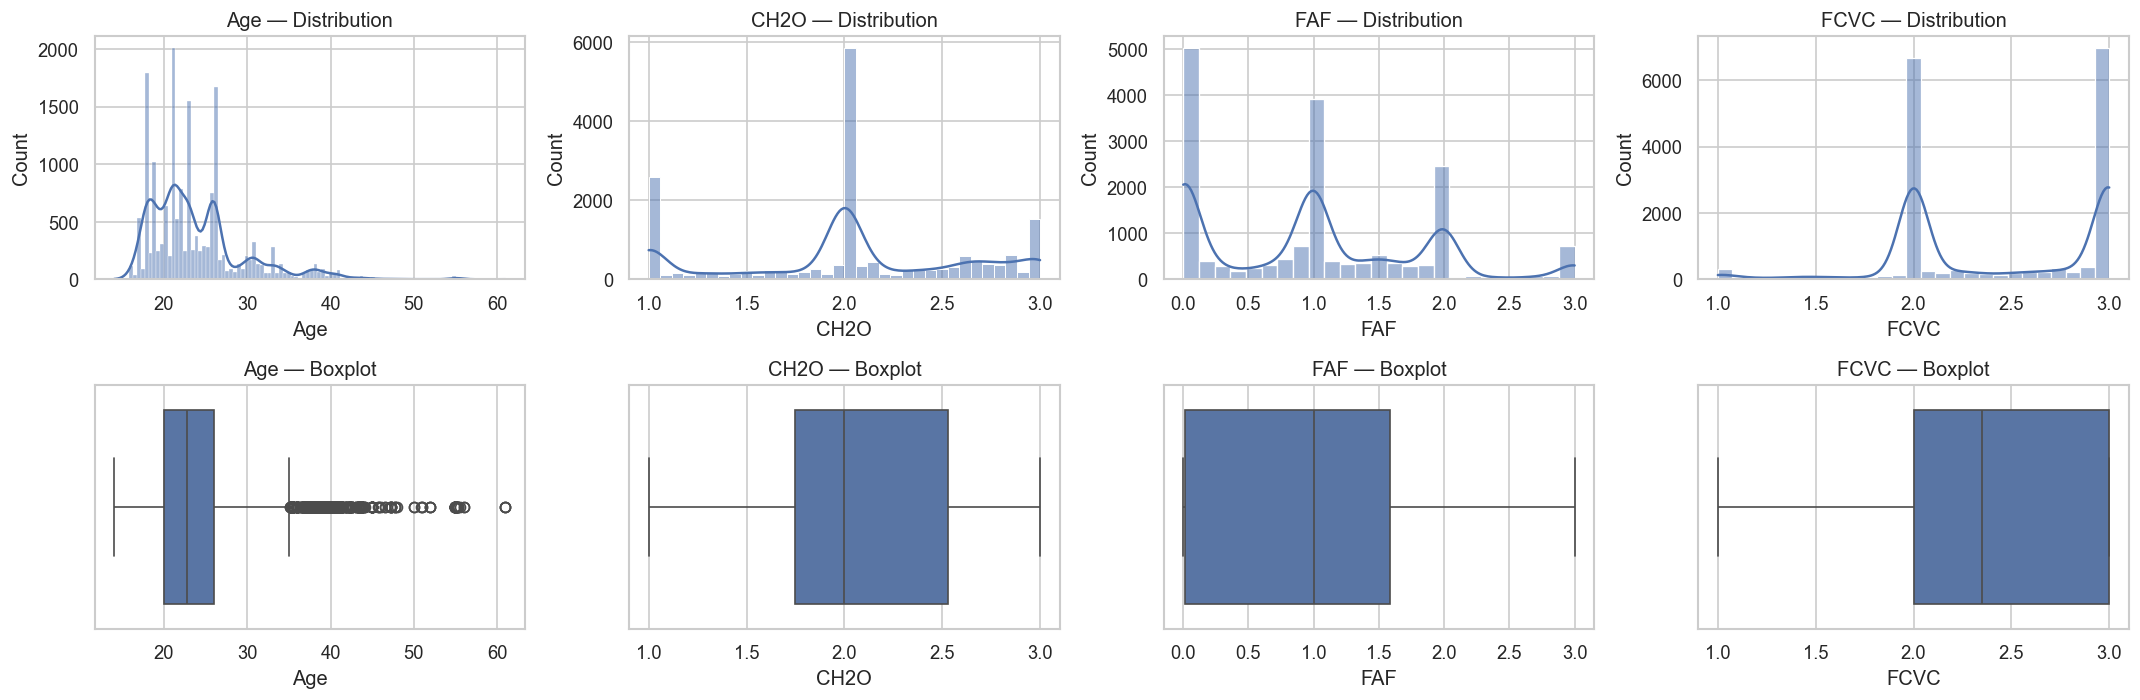

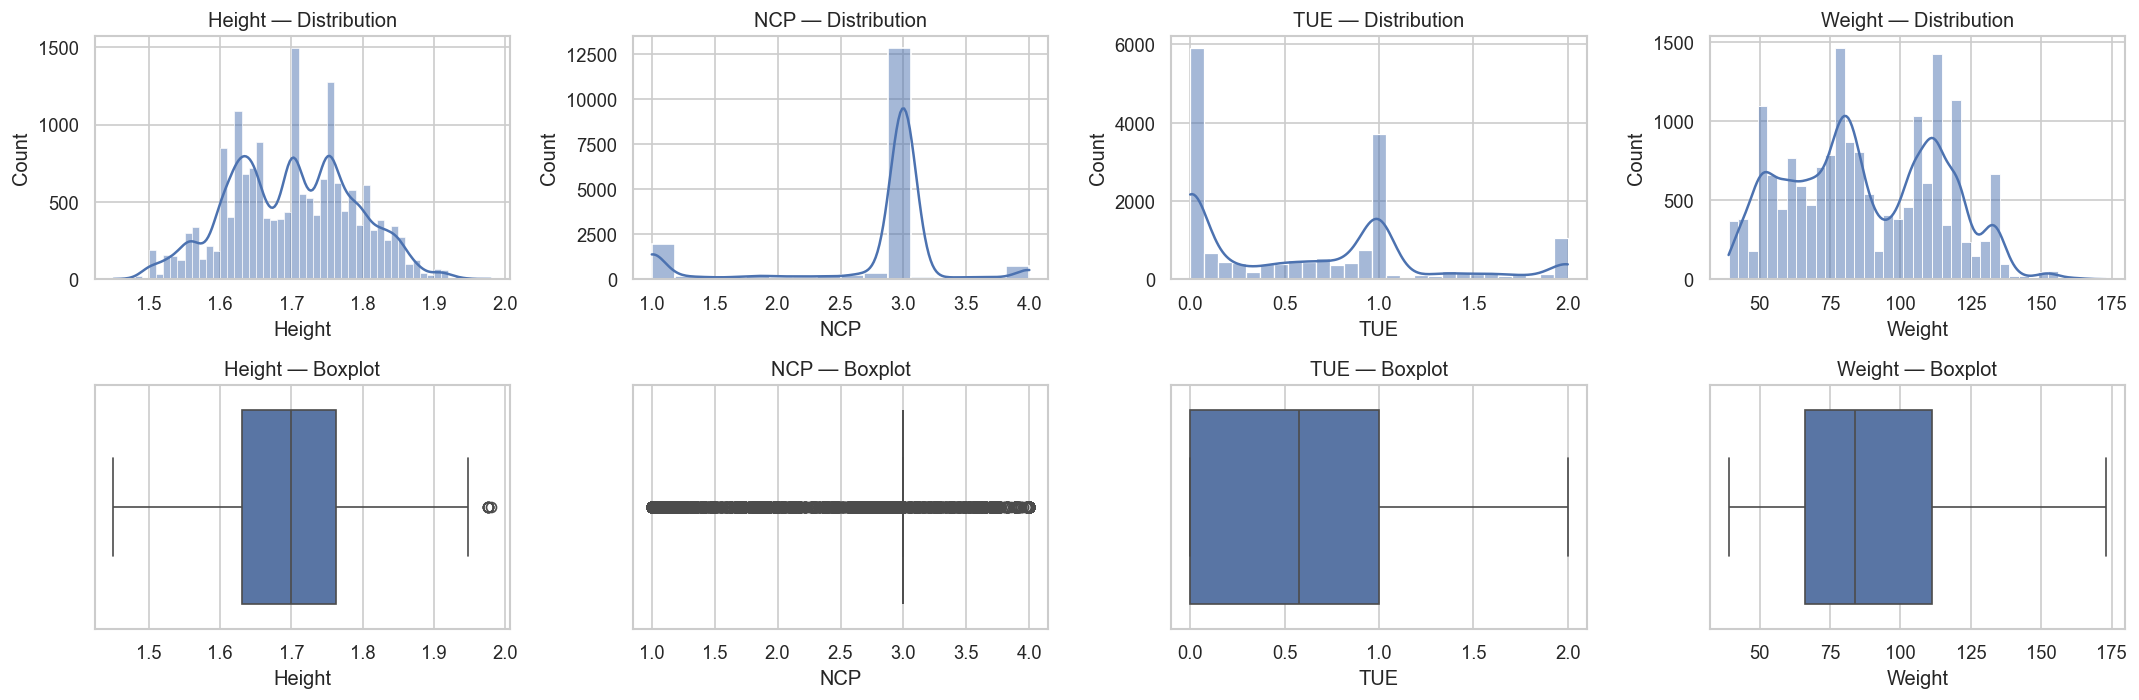

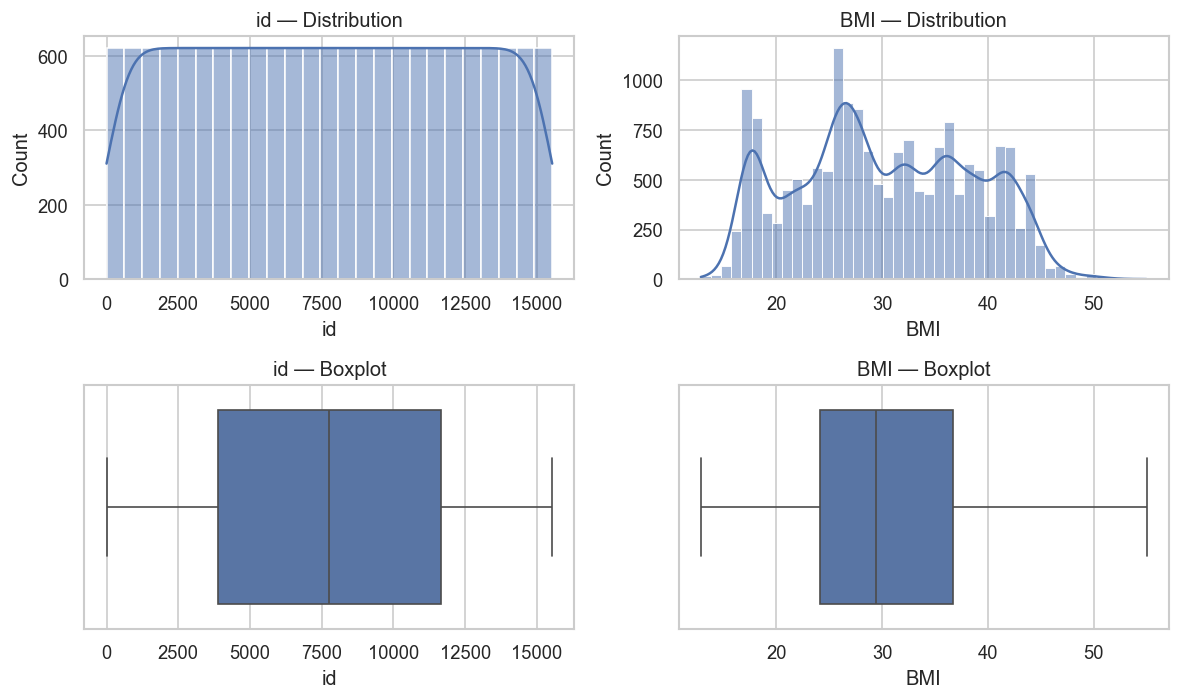

In [21]:
# Numeric distributions in groups of up to 4 (hist + box)
group = 4
for i in range(0, len(num_cols), group):
    cols = num_cols[i:i+group]
    fig, axes = plt.subplots(2, len(cols), figsize=(4*len(cols)+2, 6))
    if len(cols) == 1:
        axes = np.array([[axes[0]], [axes[1]]])
    for j, col in enumerate(cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[0, j])
        axes[0, j].set_title(f"{col} — Distribution")
        sns.boxplot(x=df[col], ax=axes[1, j])
        axes[1, j].set_title(f"{col} — Boxplot")
    plt.tight_layout(); plt.show()

**Observation (Numeric):**  
- Note skewness and outliers. This will guide **robust scaling or winsorization** if needed.

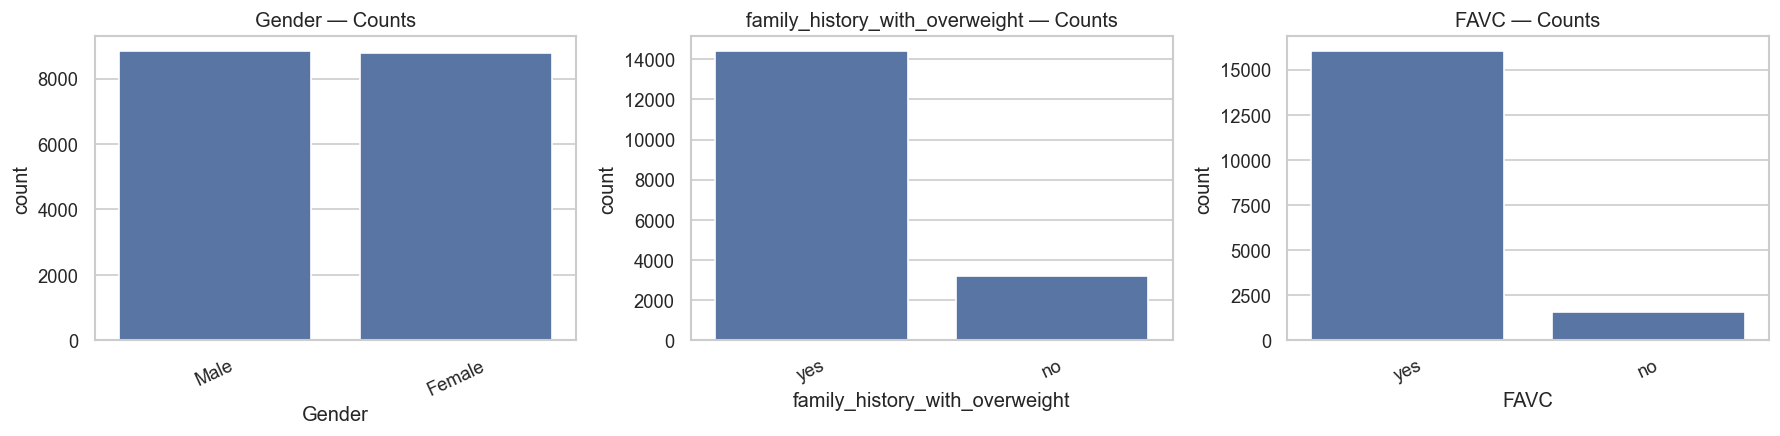

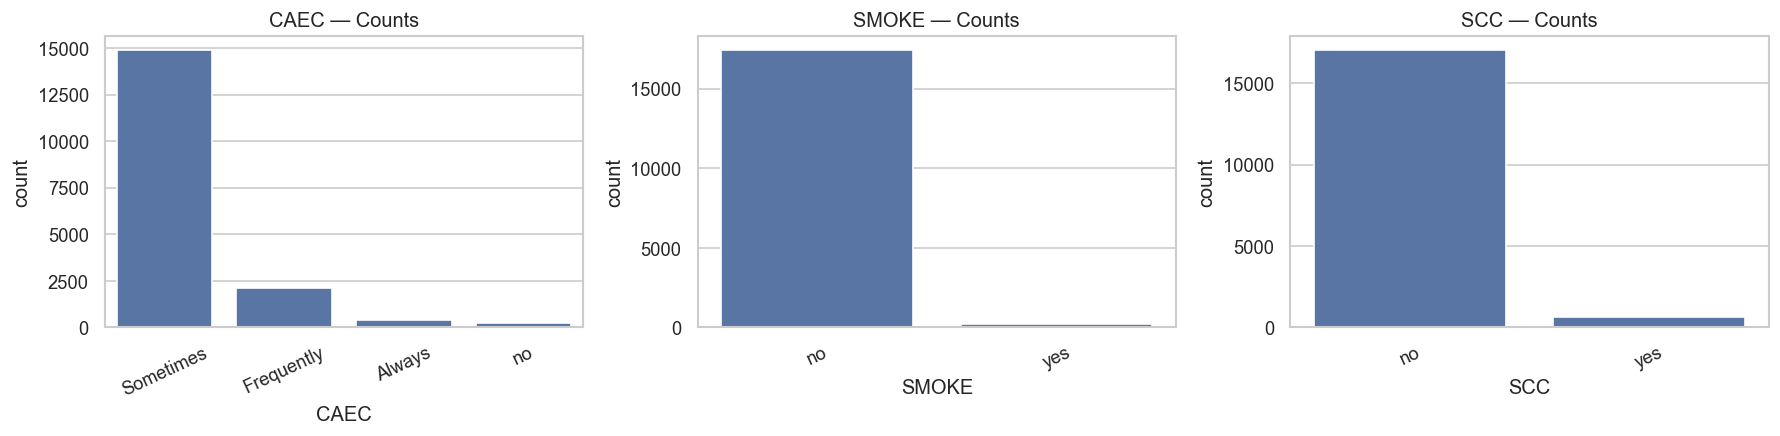

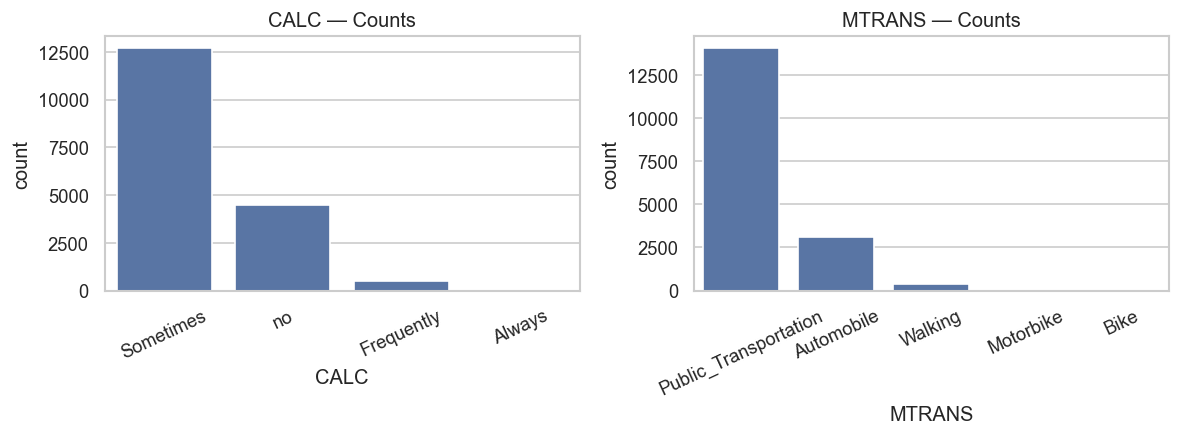

In [42]:
# Categorical counts in groups of up to 3
group = 3
for i in range(0, len(cat_cols), group):
    cols = cat_cols[i:i+group]
    fig, axes = plt.subplots(1, len(cols), figsize=(5*len(cols), 3.8))
    if len(cols) == 1: axes = [axes]
    for j, col in enumerate(cols):
        order = df[col].value_counts().index
        sns.countplot(x=df[col], order=order, ax=axes[j])
        axes[j].set_title(f"{col} — Counts")
        axes[j].tick_params(axis="x", rotation=25)
    plt.tight_layout(); plt.show()

**Observation (Categorical):**  
- Detect rare categories that may be merged or grouped later.

## 6) Bivariate EDA vs `WeightCategory` (Grouped) <a id="bivariate"></a>

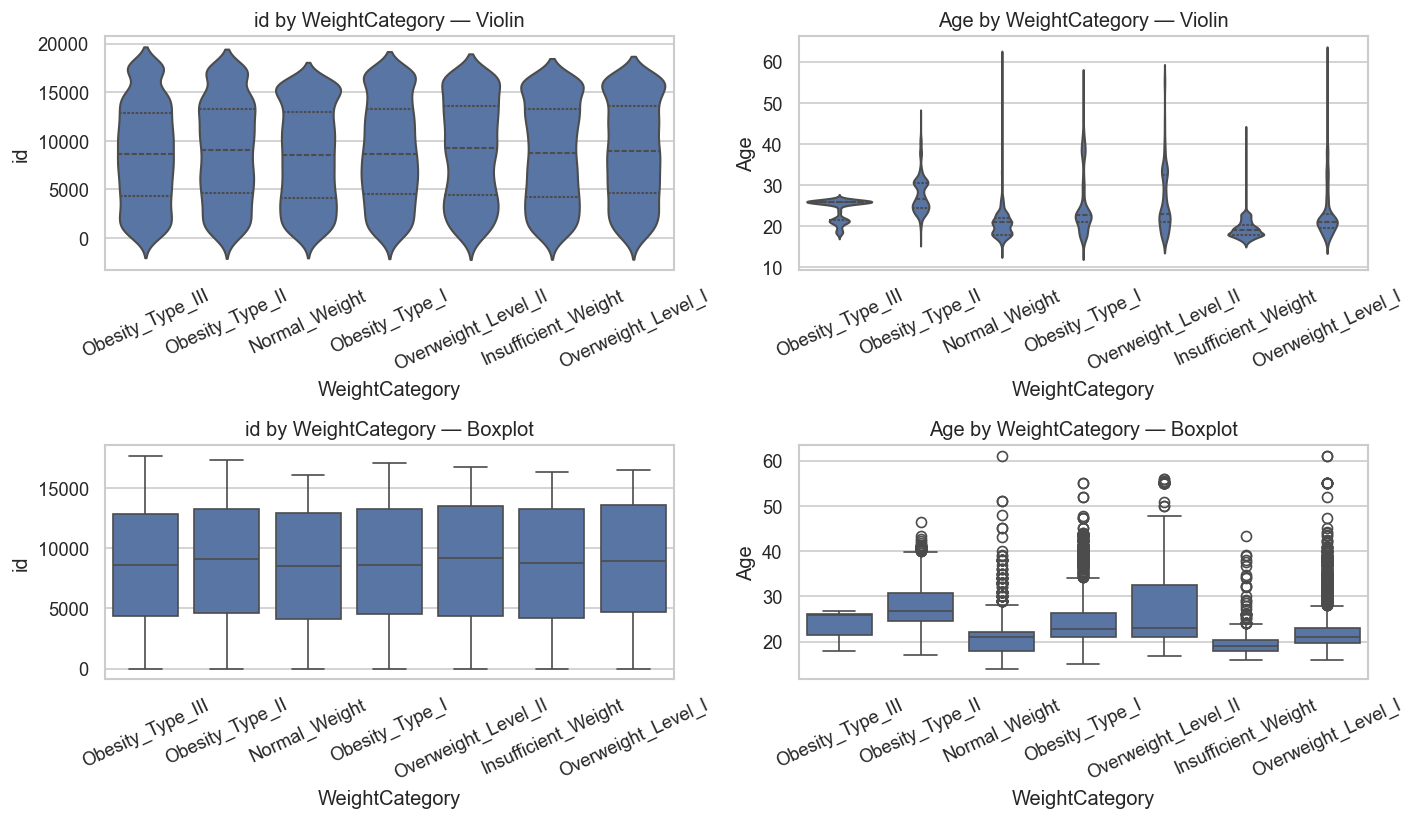

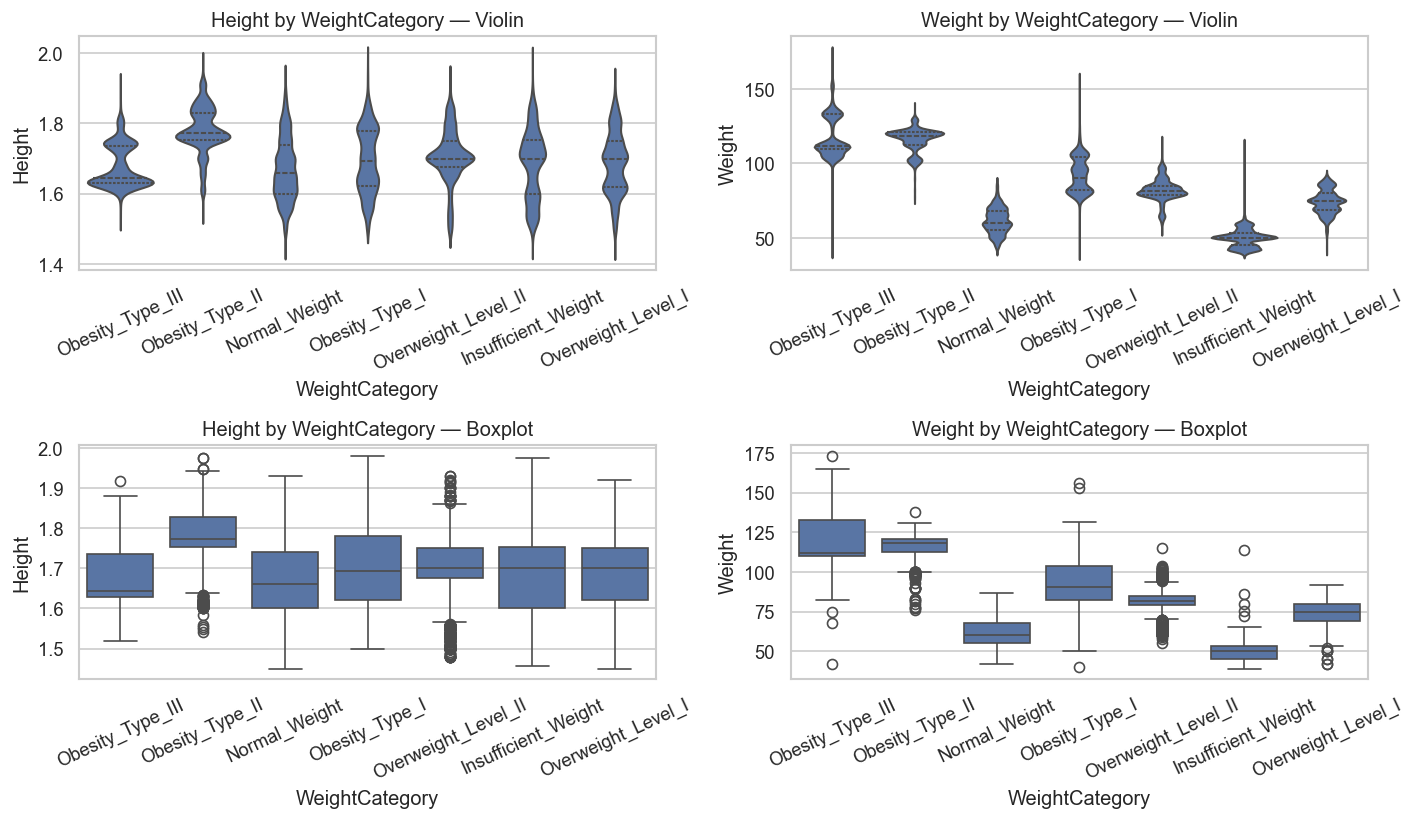

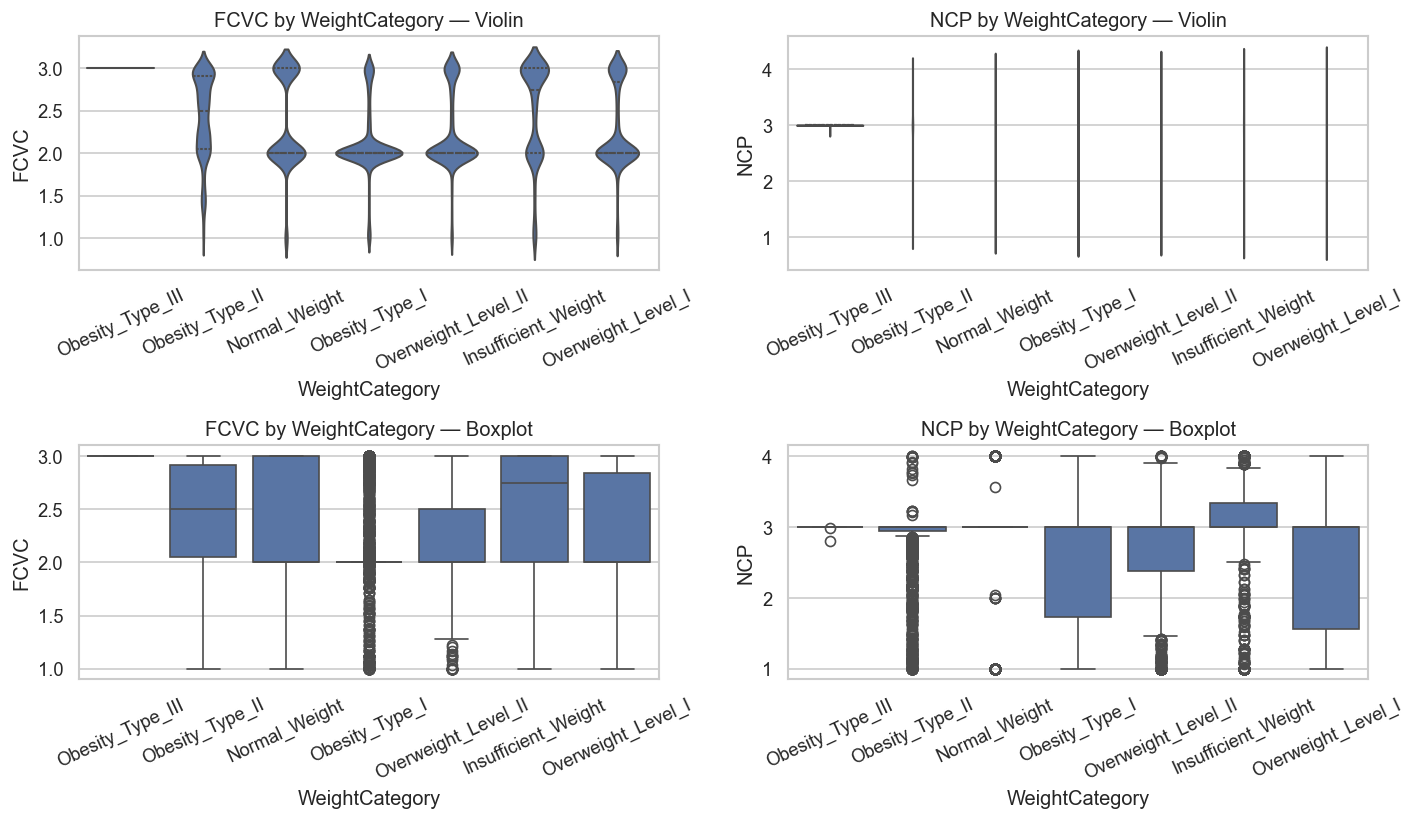

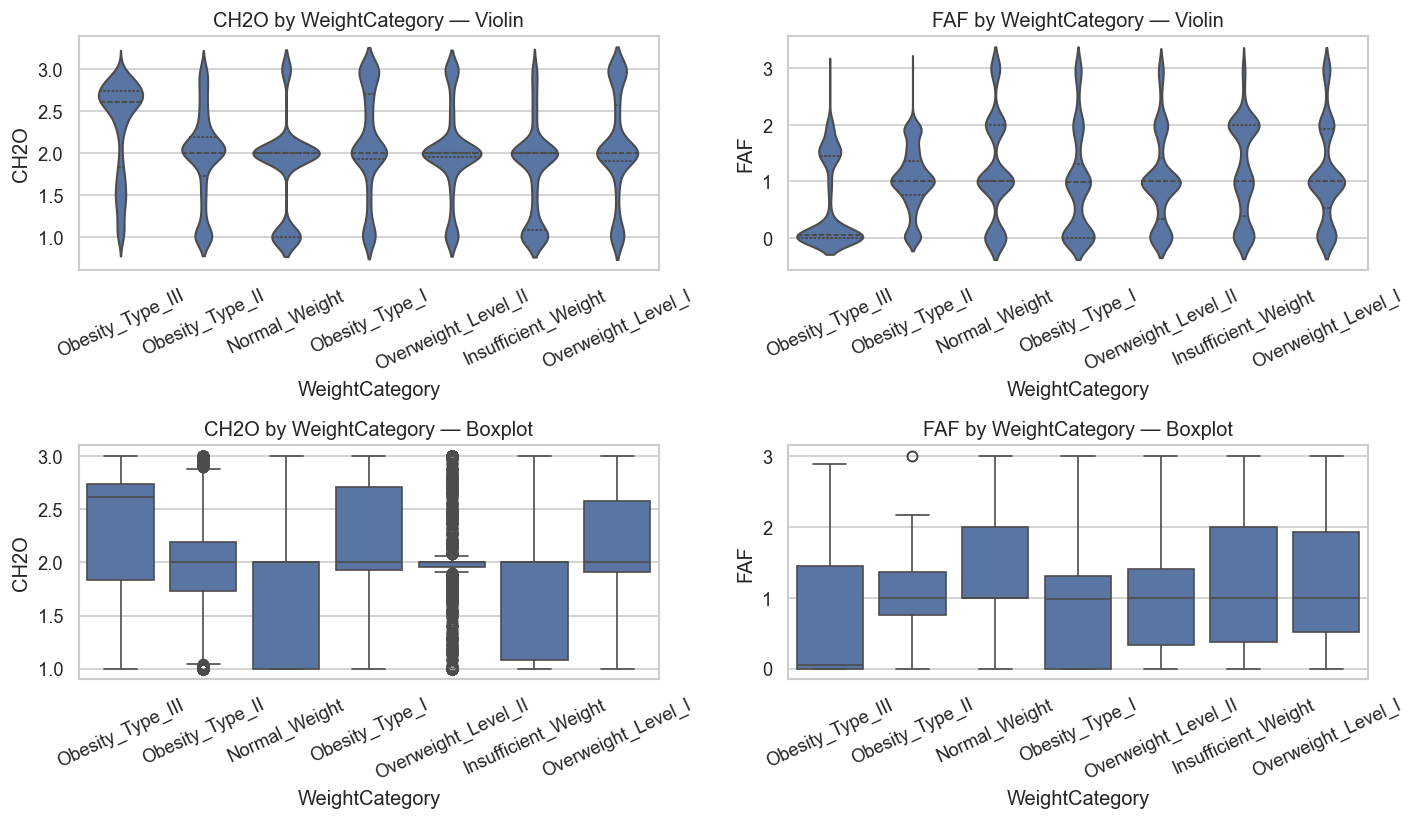

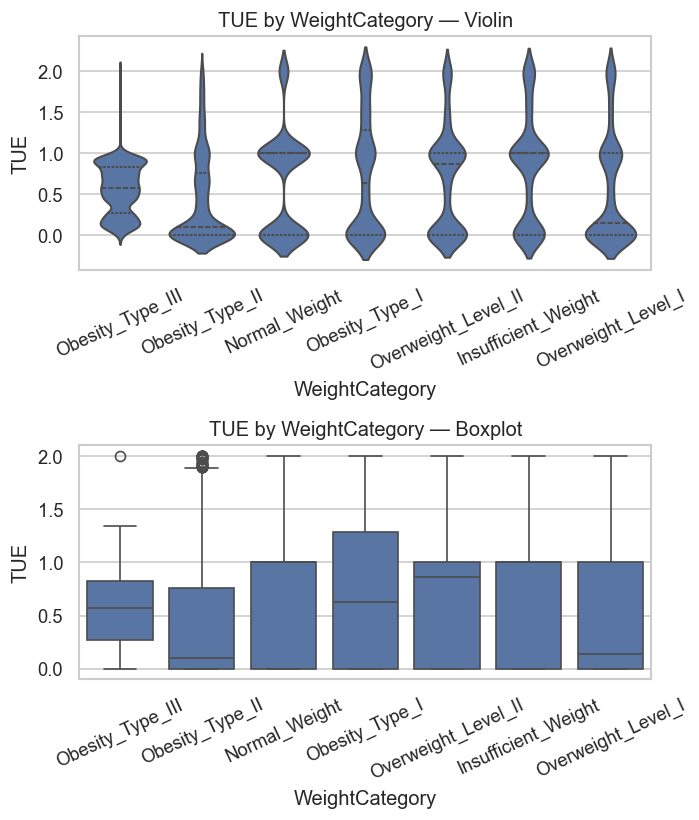

In [45]:
# Numeric vs Target: 2 at a time (violin + box)
group = 2
for i in range(0, len(num_cols), group):
    cols = num_cols[i:i+group]
    fig, axes = plt.subplots(2, len(cols), figsize=(6*len(cols), 7))
    if len(cols) == 1: axes = np.array([[axes[0]], [axes[1]]])
    for j, col in enumerate(cols):
        sns.violinplot(x=df[TARGET], y=df[col], order=class_order, ax=axes[0, j], inner="quartile")
        axes[0, j].set_title(f"{col} by {TARGET} — Violin"); axes[0, j].tick_params(axis='x', rotation=25)
        sns.boxplot(x=df[TARGET], y=df[col], order=class_order, ax=axes[1, j])
        axes[1, j].set_title(f"{col} by {TARGET} — Boxplot"); axes[1, j].tick_params(axis='x', rotation=25)
    plt.tight_layout(); plt.show()

**Observation (Numeric→Target):**  
- Look for **median shifts** and **spread differences** across weight classes—evidence of predictive signal.

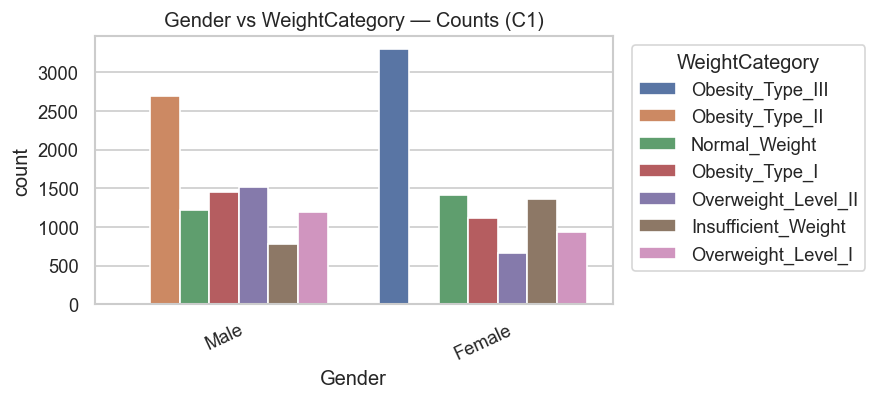

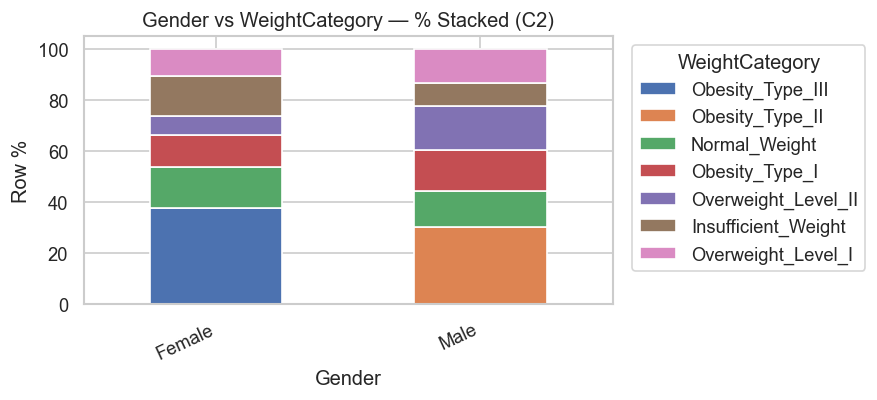

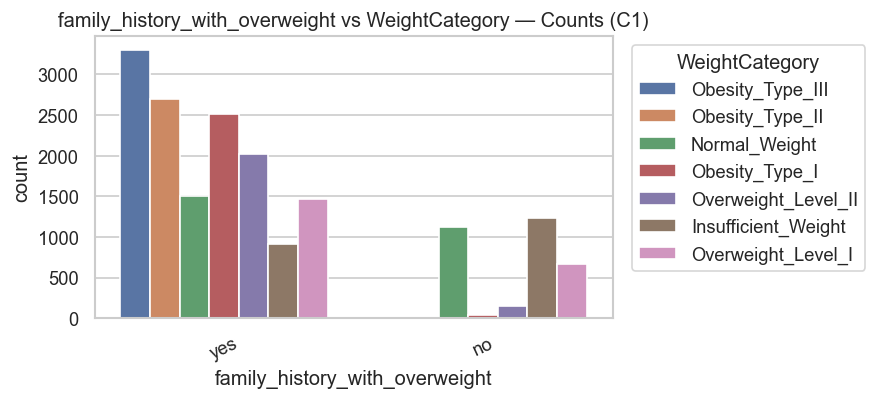

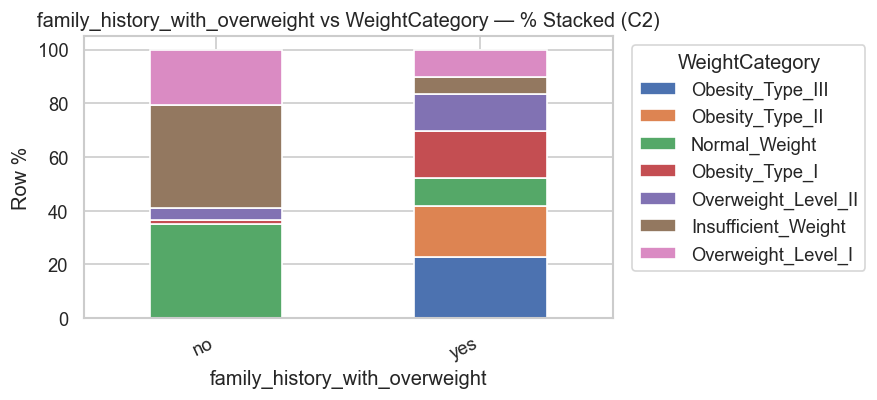

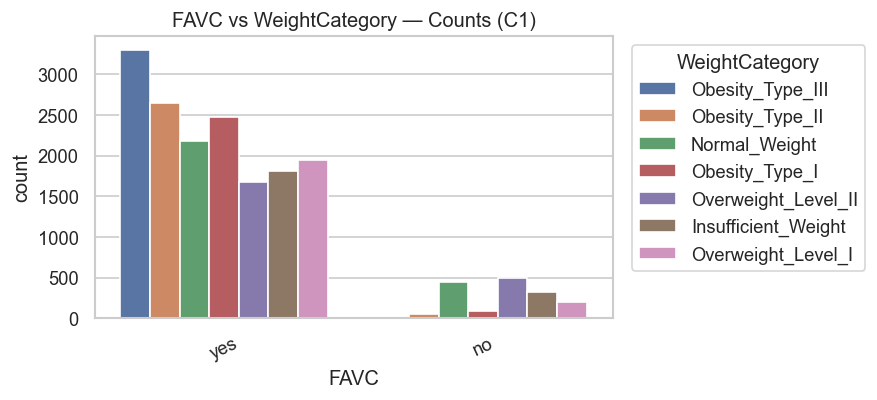

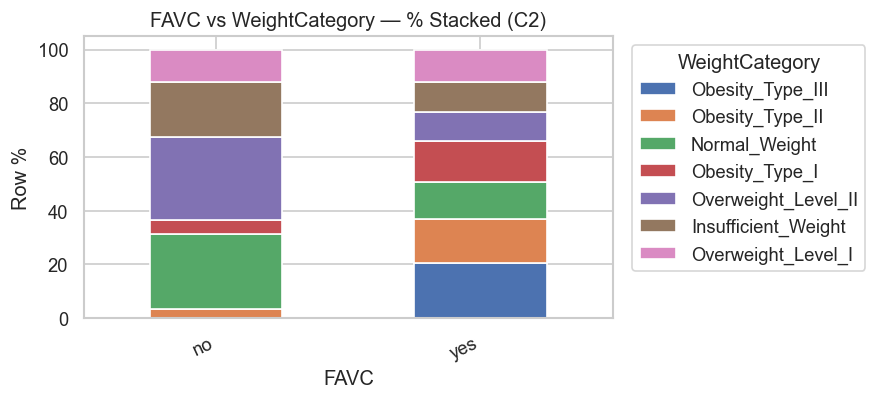

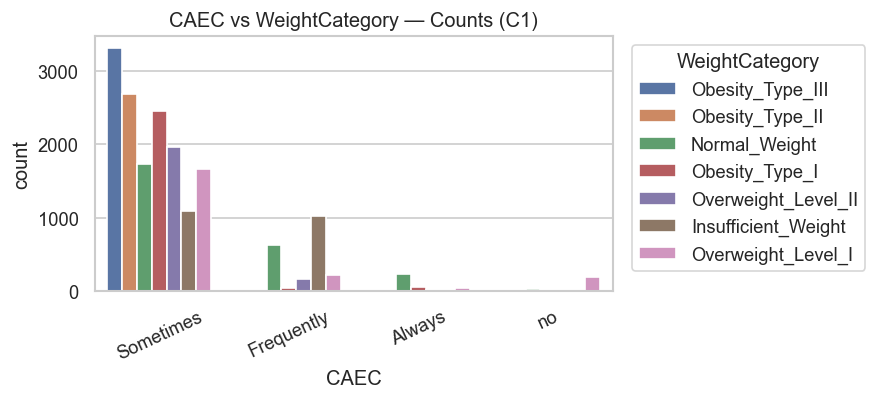

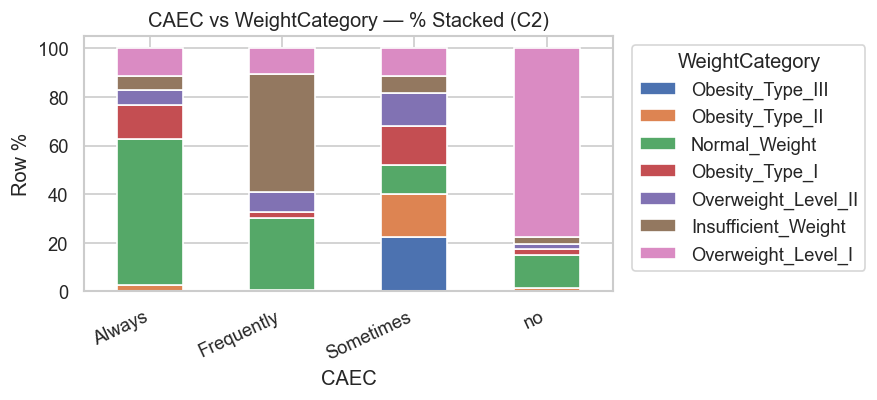

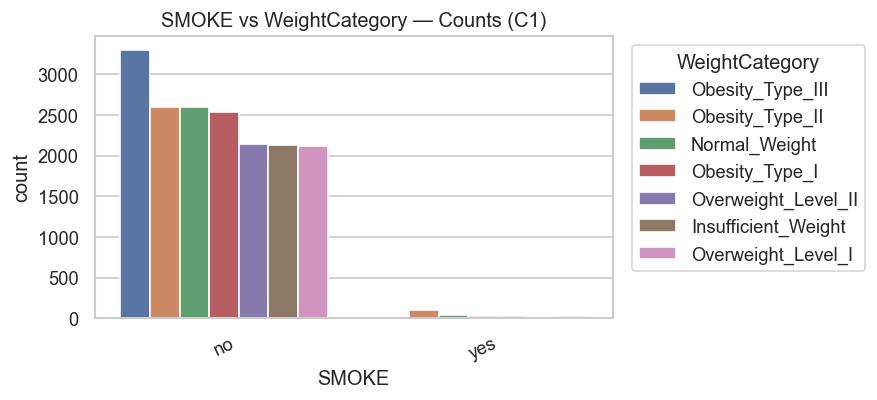

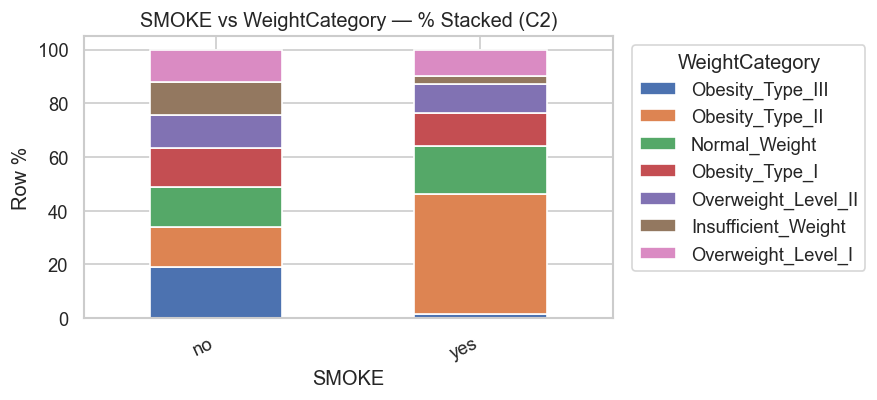

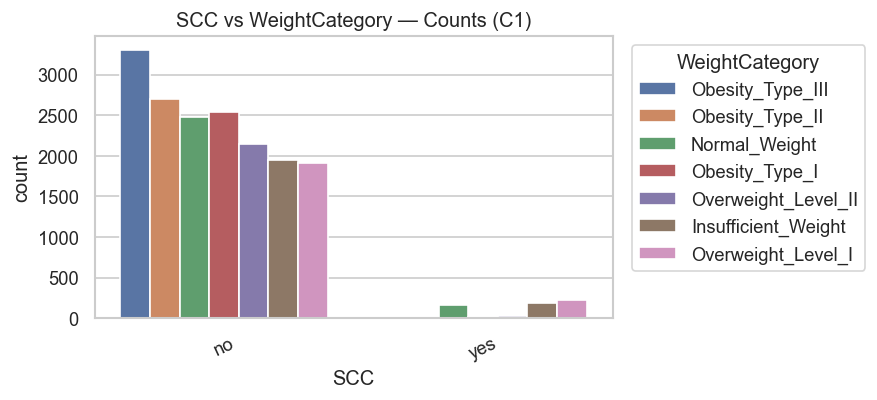

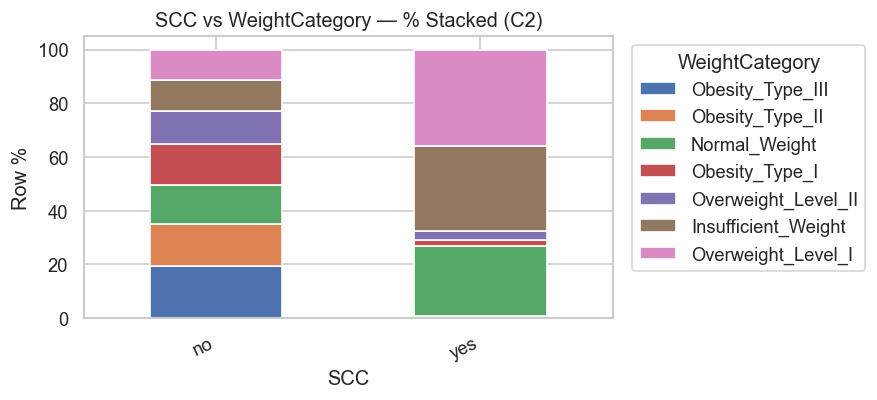

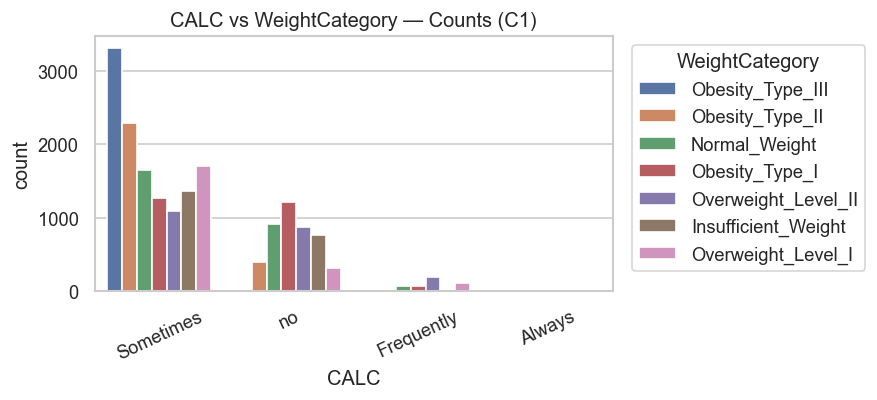

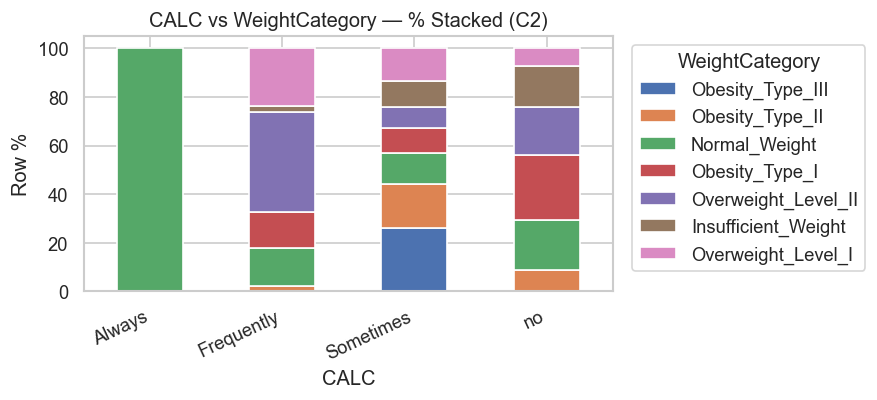

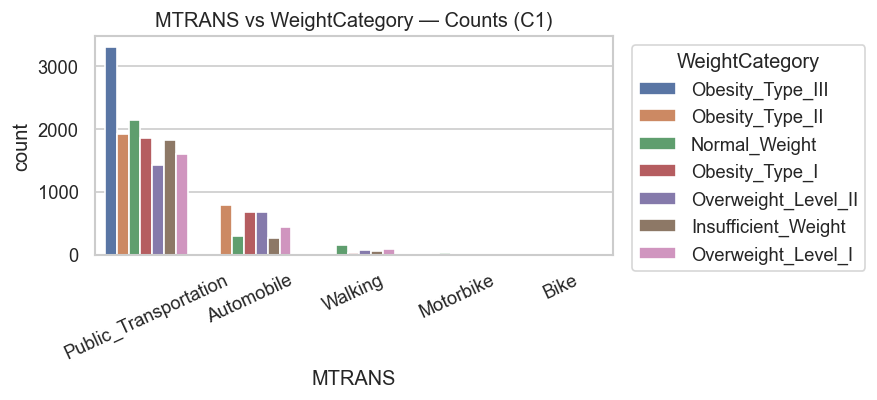

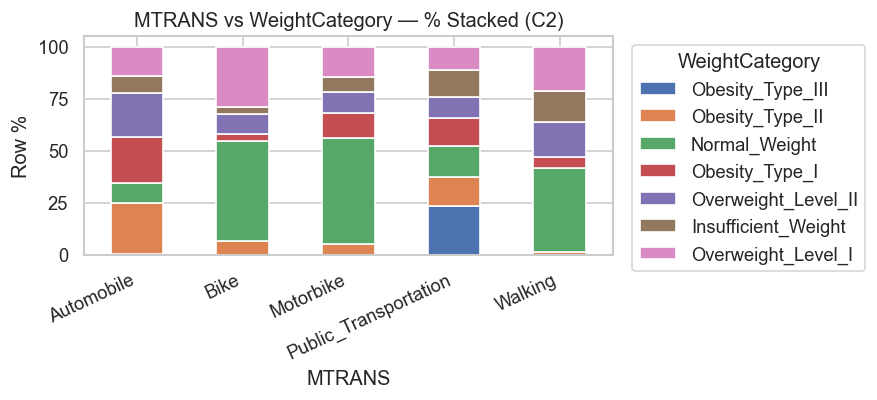

In [47]:
# Categorical vs Target: for each column, show Counts and % Stacked (C1 + C2), 2 columns per output block
group = 2
for i in range(0, len(cat_cols), group):
    cols = cat_cols[i:i+group]
    for col in cols:
        fig, ax = plt.subplots(1,1, figsize=(7.5,3.5))
        sns.countplot(x=df[col], hue=df[TARGET], hue_order=class_order, order=df[col].value_counts().index, ax=ax)
        ax.set_title(f"{col} vs {TARGET} — Counts (C1)")
        ax.legend(title=TARGET, bbox_to_anchor=(1.02,1), loc='upper left')
        ax.tick_params(axis="x", rotation=25)
        plt.tight_layout(); plt.show()

        ct = pd.crosstab(df[col], df[TARGET], normalize="index") * 100.0
        ct = ct[class_order]
        ct.plot(kind="bar", stacked=True, figsize=(7.5,3.5))
        plt.title(f"{col} vs {TARGET} — % Stacked (C2)")
        plt.xlabel(col); plt.ylabel("Row %")
        plt.xticks(rotation=25, ha="right")
        plt.legend(title=TARGET, bbox_to_anchor=(1.02,1), loc='upper left')
        plt.tight_layout(); plt.show()

**Observation (Categorical→Target):**  
- Percent stacked bars show how the **composition of weight classes** changes across categories.

## 7) Correlation & Height–Weight Insight → BMI Motivation <a id="corr-bmi"></a>

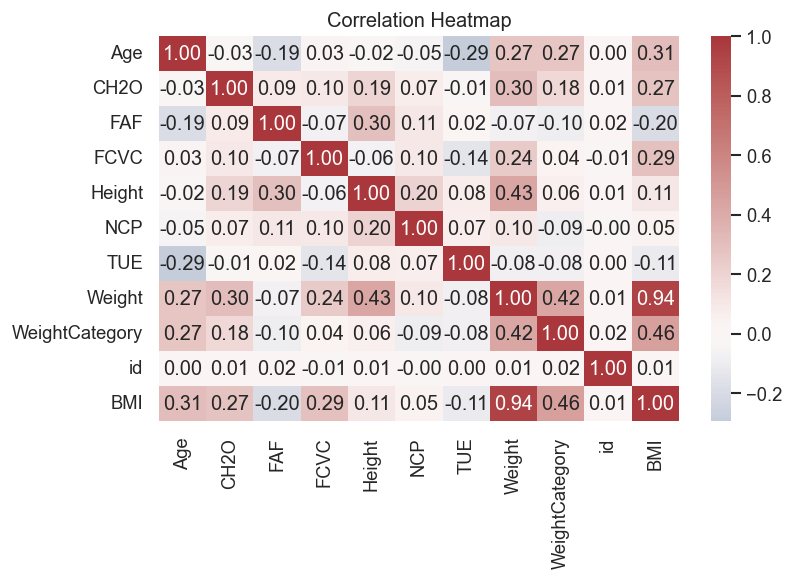

Numeric features ordered by |corr(target)|:
['BMI', 'Weight', 'Age', 'CH2O', 'FAF', 'NCP', 'TUE', 'Height', 'FCVC', 'id']


In [27]:
# Encode target numerically for correlation reference only
df_num = df.copy()
if df_num["WeightCategory"].dtype == "object":
    df_num["WeightCategory"] = df_num["WeightCategory"].astype("category").cat.codes

num_cols_corr = df_num.select_dtypes(include=[np.number]).columns.tolist()
corr = df_num[num_cols_corr].corr() if len(num_cols_corr) > 1 else pd.DataFrame()

if not corr.empty:
    plt.figure(figsize=(7,5))
    sns.heatmap(corr, cmap="vlag", center=0, annot=True, fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout(); plt.show()

# Order numeric features by absolute correlation with the encoded target (N3)
tgt = "WeightCategory"
if tgt in corr.columns:
    ordered_numeric = corr[tgt].drop(tgt, errors="ignore").abs().sort_values(ascending=False).index.tolist()
else:
    # fallback to the earlier numeric list
    ordered_numeric = [c for c in df.select_dtypes(include=[np.number]).columns if c != TARGET]

print("Numeric features ordered by |corr(target)|:")
print(ordered_numeric[:10])

**Observation:**  
- **Height** and **Weight** typically show **high correlation** with the encoded target.  
- Since these two jointly describe body mass/size, a **derived feature `BMI = Weight / Height²`** is a natural, domain-driven choice.

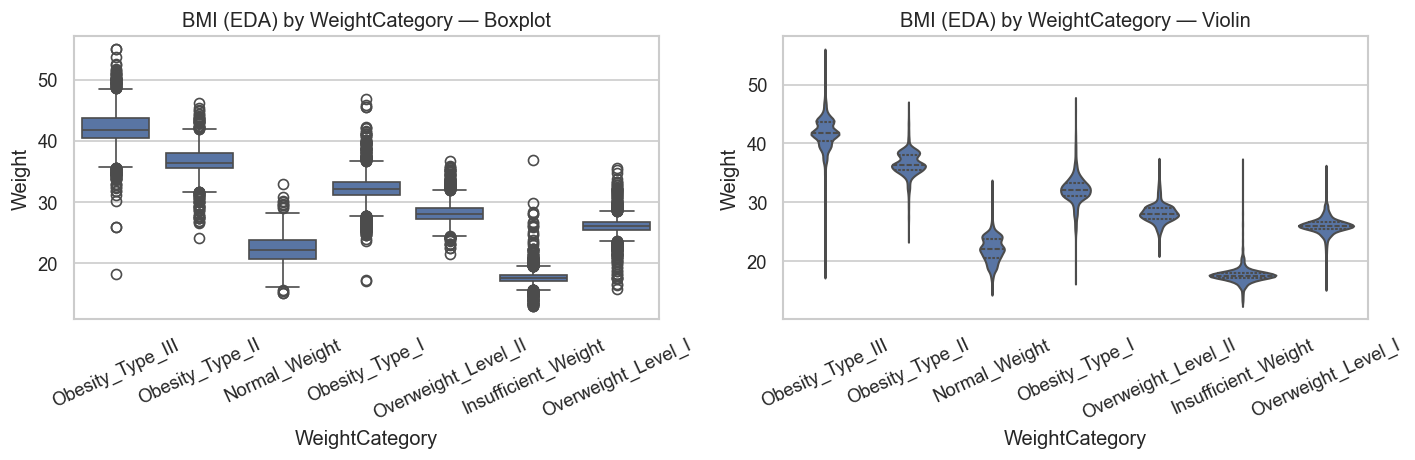

In [52]:
# EDA-only BMI computation (does NOT modify df), then BMI vs WeightCategory
def _find_col(candidates):
    cand_norm = [c.lower() for c in df.columns]
    for pattern in candidates:
        for c in df.columns:
            if pattern in c.lower(): return c
    return None

COL_GENDER = _find_col(["gender","sex"])  # for gender splits
COL_HEIGHT = _find_col(["height"])
COL_WEIGHT = _find_col(["weight"])

def _bmi_series(df, hcol, wcol):
    if hcol is None or wcol is None: return None
    h = pd.to_numeric(df[hcol], errors="coerce").astype(float)
    hm = np.where(h.median() > 3.0, h/100.0, h)  # cm→m if needed
    w = pd.to_numeric(df[wcol], errors="coerce").astype(float)
    with np.errstate(divide="ignore", invalid="ignore"):
        bmi = w / (hm**2 + 1e-12)
    return pd.Series(bmi).replace([np.inf, -np.inf], np.nan)

bmi_e = _bmi_series(df, COL_HEIGHT, COL_WEIGHT)
if bmi_e is not None:
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(x=df[TARGET], y=bmi_e, order=class_order, ax=ax[0])
    ax[0].set_title(f"BMI (EDA) by {TARGET} — Boxplot"); ax[0].tick_params(axis='x', rotation=25)
    sns.violinplot(x=df[TARGET], y=bmi_e, order=class_order, inner="quartile", ax=ax[1])
    ax[1].set_title(f"BMI (EDA) by {TARGET} — Violin"); ax[1].tick_params(axis='x', rotation=25)
    plt.tight_layout(); plt.show()
else:
    print("Height/Weight not found; skipping BMI overview plot.")

**Observation:**  
- **BMI** displays **clearer separation** across weight categories than Height or Weight individually.  
- This **justifies adding BMI in preprocessing** as a derived feature for modeling.

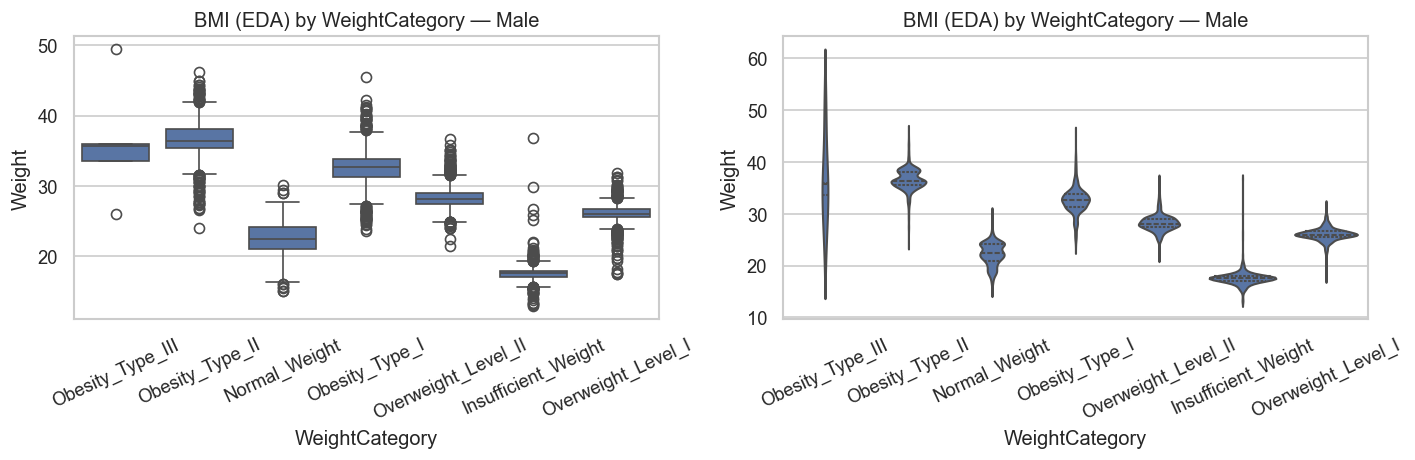

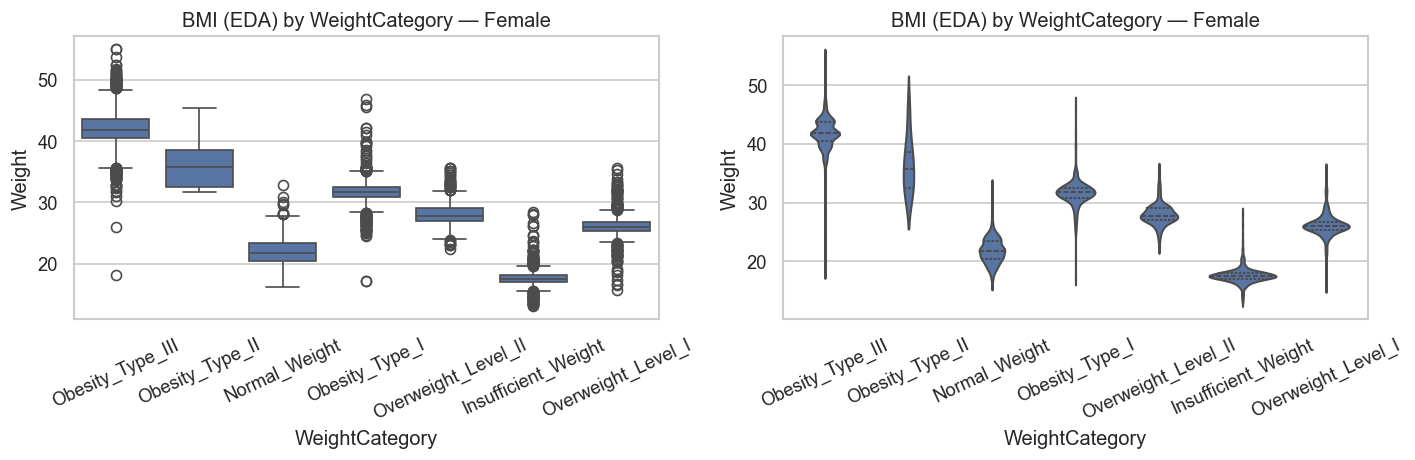

In [54]:
# BMI by Gender
if bmi_e is not None and COL_GENDER is not None:
    male_mask = df[COL_GENDER].astype(str).str.lower().str.startswith("m")
    female_mask = df[COL_GENDER].astype(str).str.lower().str.startswith("f")

    # Male
    if male_mask.any():
        fig, ax = plt.subplots(1,2, figsize=(12,4))
        sns.boxplot(x=df.loc[male_mask, TARGET], y=bmi_e.loc[male_mask], order=class_order, ax=ax[0])
        ax[0].set_title("BMI (EDA) by WeightCategory — Male"); ax[0].tick_params(axis='x', rotation=25)
        sns.violinplot(x=df.loc[male_mask, TARGET], y=bmi_e.loc[male_mask], order=class_order, inner="quartile", ax=ax[1])
        ax[1].set_title("BMI (EDA) by WeightCategory — Male"); ax[1].tick_params(axis='x', rotation=25)
        plt.tight_layout(); plt.show()

    # Female
    if female_mask.any():
        fig, ax = plt.subplots(1,2, figsize=(12,4))
        sns.boxplot(x=df.loc[female_mask, TARGET], y=bmi_e.loc[female_mask], order=class_order, ax=ax[0])
        ax[0].set_title("BMI (EDA) by WeightCategory — Female"); ax[0].tick_params(axis='x', rotation=25)
        sns.violinplot(x=df.loc[female_mask, TARGET], y=bmi_e.loc[female_mask], order=class_order, inner="quartile", ax=ax[1])
        ax[1].set_title("BMI (EDA) by WeightCategory — Female"); ax[1].tick_params(axis='x', rotation=25)
        plt.tight_layout(); plt.show()

**Observation:**  
- Sex-specific BMI distributions can differ. This supports our later decision to train **gender-specific models**.

## 8) Focused Analyses <a id="focused"></a>

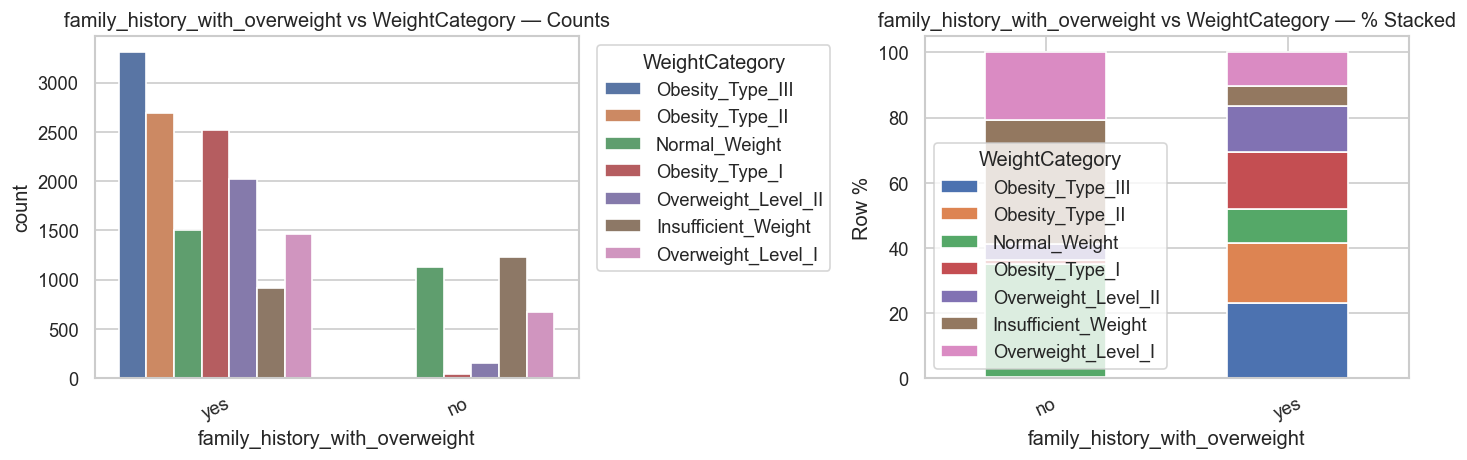

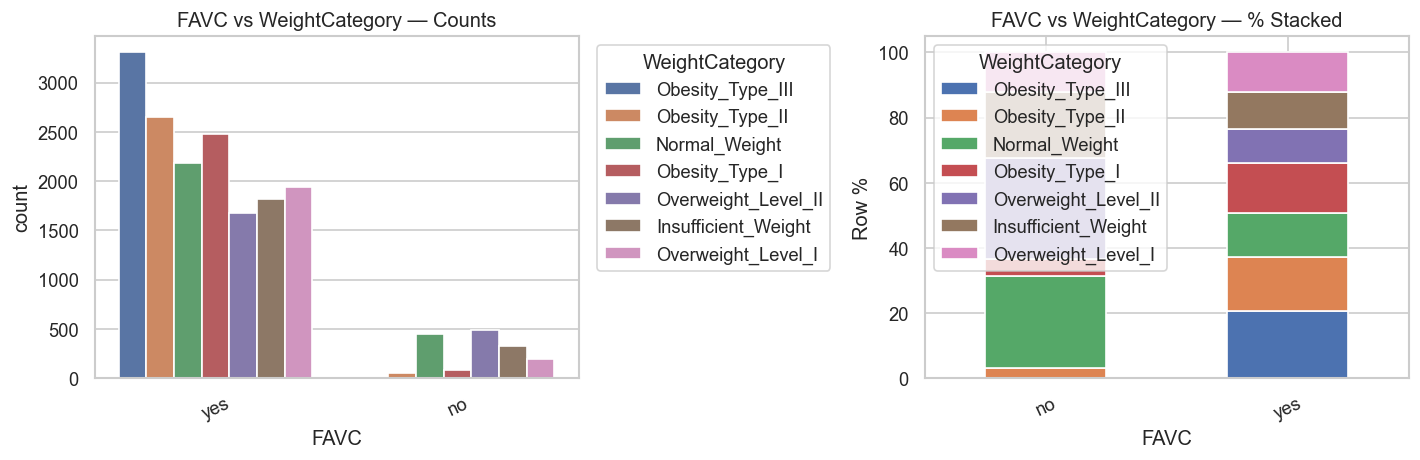

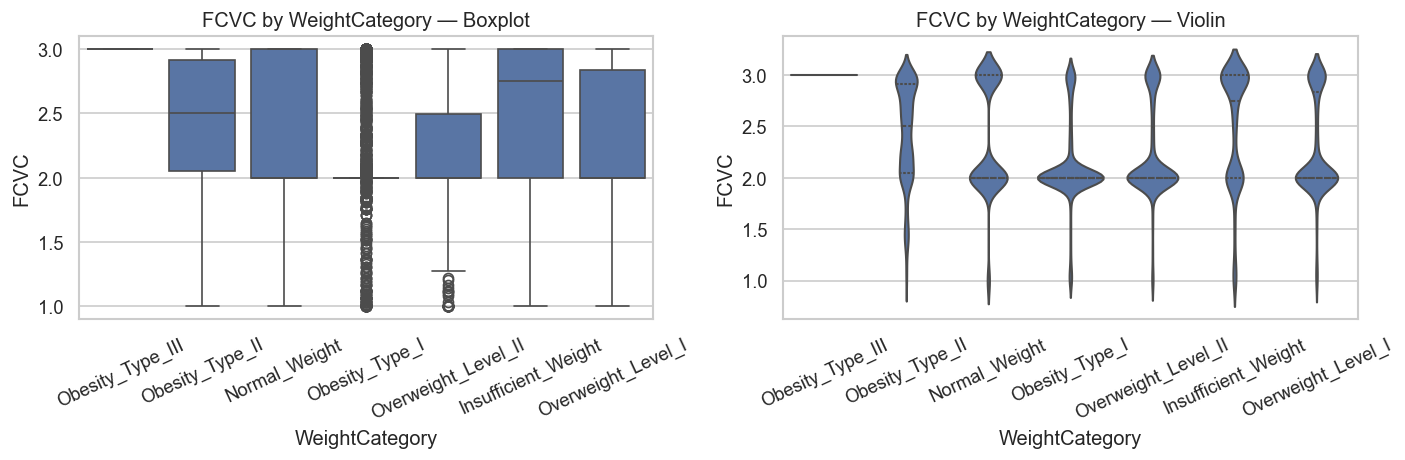

In [58]:
def _find_col(candidates):
    for pattern in candidates:
        for c in df.columns:
            if pattern in c.lower(): return c
    return None

COL_FHO  = _find_col(["family_history_with_overweight","fho","family history","familyhistory"])
COL_FAVC = _find_col(["favc","high-calorie","high calorie","frequent high"])
COL_FCVC = _find_col(["fcvc","vegetable","veggie"])

# 8.1 Family History vs WeightCategory
if COL_FHO is not None:
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    sns.countplot(x=df[COL_FHO], hue=df[TARGET], hue_order=class_order, ax=ax[0],
                  order=df[COL_FHO].value_counts().index)
    ax[0].set_title(f"{COL_FHO} vs {TARGET} — Counts")
    ax[0].legend(title=TARGET, bbox_to_anchor=(1.02,1), loc='upper left')
    ax[0].tick_params(axis='x', rotation=25)

    ct = pd.crosstab(df[COL_FHO], df[TARGET], normalize="index") * 100.0
    ct = ct[class_order]
    ct.plot(kind="bar", stacked=True, ax=ax[1])
    ax[1].set_title(f"{COL_FHO} vs {TARGET} — % Stacked")
    ax[1].set_xlabel(COL_FHO); ax[1].set_ylabel("Row %")
    ax[1].tick_params(axis='x', rotation=25)
    plt.tight_layout(); plt.show()

# 8.2 FAVC vs WeightCategory
if COL_FAVC is not None:
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    sns.countplot(x=df[COL_FAVC], hue=df[TARGET], hue_order=class_order, ax=ax[0],
                  order=df[COL_FAVC].value_counts().index)
    ax[0].set_title(f"{COL_FAVC} vs {TARGET} — Counts")
    ax[0].legend(title=TARGET, bbox_to_anchor=(1.02,1), loc='upper left')
    ax[0].tick_params(axis='x', rotation=25)

    ct = pd.crosstab(df[COL_FAVC], df[TARGET], normalize="index") * 100.0
    ct = ct[class_order]
    ct.plot(kind="bar", stacked=True, ax=ax[1])
    ax[1].set_title(f"{COL_FAVC} vs {TARGET} — % Stacked")
    ax[1].set_xlabel(COL_FAVC); ax[1].set_ylabel("Row %")
    ax[1].tick_params(axis='x', rotation=25)
    plt.tight_layout(); plt.show()

# 8.3 FCVC vs WeightCategory
if COL_FCVC is not None:
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    sns.boxplot(x=df[TARGET], y=df[COL_FCVC], order=class_order, ax=ax[0])
    ax[0].set_title(f"{COL_FCVC} by {TARGET} — Boxplot")
    ax[0].tick_params(axis='x', rotation=25)

    sns.violinplot(x=df[TARGET], y=df[COL_FCVC], order=class_order, inner="quartile", ax=ax[1])
    ax[1].set_title(f"{COL_FCVC} by {TARGET} — Violin")
    ax[1].tick_params(axis='x', rotation=25)
    plt.tight_layout(); plt.show()

**Observation:**  
- **Family History (FHO)** often correlates with higher weight categories.  
- **FAVC** (frequent high-calorie foods) may skew distributions toward overweight/obese classes.  
- **FCVC** (vegetables) tends to be higher in normal/lower classes.

## 9) Categorical Association (Chi-square & Cramér’s V) <a id="assoc"></a>

In [62]:
def cramers_v(confusion):
    chi2, p, dof, _ = chi2_contingency(confusion)
    n = confusion.values.sum()
    if n == 0: return np.nan, p
    phi2 = chi2 / n
    r, k = confusion.shape
    phi2_corr = max(0, phi2 - (k-1)*(r-1)/(n-1)) if n > 1 else 0
    r_corr = r - (r-1)**2/(n-1) if n > 1 else 1
    k_corr = k - (k-1)**2/(n-1) if n > 1 else 1
    denom = max((min(k_corr-1, r_corr-1)), 1e-9)
    return np.sqrt(phi2_corr / denom), p

results = []
for col in df.select_dtypes(exclude=[np.number]).columns:
    if col == TARGET: continue
    table = pd.crosstab(df[col], df[TARGET])
    if table.size == 0 or table.shape[0] < 2 or table.shape[1] < 2: 
        continue
    cv, p = cramers_v(table)
    results.append({"feature": col, "chi2_pvalue": p, "cramers_v": cv, "levels": table.shape[0]})

assoc_df = pd.DataFrame(results).sort_values(by=["cramers_v"], ascending=False)
display(assoc_df)

,feature,chi2_pvalue,cramers_v,levels
0,Gender,0.000000e+00,0.608426,2
1,family_history_with_overweight,0.000000e+00,0.556445,2
3,CAEC,0.000000e+00,0.332887,4
2,FAVC,1.574699e-297,0.280244,2
6,CALC,0.000000e+00,0.248397,4
5,SCC,1.395500e-180,0.218861,2
7,MTRANS,0.000000e+00,0.164550,5
4,SMOKE,6.962446e-37,0.100229,2


### 📌 Interpretation of Categorical Association Results

The Chi-square p-values are effectively **zero for all categorical features**, which means:

> ✅ *Each categorical feature has a statistically significant relationship with the target `WeightCategory`.*

However, the strength of that relationship is better understood using **Cramér’s V**, which ranges from **0 (no association)** to **1 (perfect association)**. Based on the values:

| Strength Level | Cramér’s V Range |
|----------------|------------------|
| **Very Strong** | ≥ 0.50 |
| **Moderate** | 0.30 – 0.50 |
| **Weak–Moderate** | 0.15 – 0.30 |
| **Weak** | 0.05 – 0.15 |

**From our results:**

- **Gender** and **family_history_with_overweight** show **very strong association** with obesity levels → they are **key predictors**.
- **CAEC, FAVC, CALC, SCC** show **moderate influence**, mostly related to **food habits and lifestyle choices** → these should be **retained and explored further**.
- **MTRANS** and **SMOKE** have **weak association**, suggesting **limited predictive power** → these may be **optional or removable** during feature selection if needed.

### ✅ **Why this matters**

These insights help shape our modeling strategy:

| Decision Insight | Impact on Next Steps |
|------------------|----------------------|
| Gender is highly predictive | We will consider **gender-specific modeling** during ML |
| Family history has strong effect | Keep it as a **core feature** |
| Eating habit features matter | Use **CAEC, FAVC, CALC, SCC** in modeling |
| Smoking & transport weak | Can be **dropped later** if they add noise |

---

### ✅ **Connection to Feature Engineering**

We also observed earlier that **Height and Weight were correlated with the target**, which led us to explore **BMI** (derived from Height and Weight). Since BMI shows even **cleaner separation across Weight Categories**, it will be a planned part of preprocessing:

> **Next notebook:** we will **engineer BMI**, encode categorical features, scale numeric features, and prepare data for modeling.

---



## 10) Key Insights & Next Steps <a id="insights"></a>

**Key EDA Insights:**  
- `WeightCategory` has the following class balance (see Sec. 4).  
- **Height** and **Weight** show **strong association** with the target.  
- This **naturally motivated** creating a derived feature **BMI**, which (even in EDA-only form) shows **clearer separation** by class and will be added in preprocessing.  
- Lifestyle features (**FHO, FAVC, FCVC**, etc.) also show distinct patterns across classes.  
- Numeric correlation and categorical association highlight promising signals and redundancy.

**Next Steps (Preprocessing & Modeling):**  
1. **Engineer BMI** from Height & Weight (retain original columns).  
2. **Encode** categoricals (One-Hot Encoding).  
3. **Standardize** numeric features; consider robust approaches for outliers.  
4. Use **stratified CV**; consider **class weights** if imbalance persists.  
5. Train **gender-specific XGBoost** models with early stopping and tuned hyperparameters.